# Pandas

---

pandas 是基于 python 的一个非常强大的数据分析工具。它经常被用于 data science，数据分析，机器学习等领域。

pandas 配合 python 简洁的语法，使得许多分析可以通过在线编程的方式进行，可以配合 matplotlib 和 jupyter notebook 等工具实现实时的可视化。为数据分析提供了直观、实时的体验。

pandas 的使用方式非常类似 Excel 表格和关系型数据库。相比普通的 Excel 表格，pandas 可以配合 python 语言的强大功能实现更强大的数据处理。

本 note 是一个 pandas 的入门教学。pandas 提供的各种 API 的参考文档可以在这里找到：http://pandas.pydata.org/pandas-docs/

下面通过几个例子来说明 pandas 的直观和方便。


## 加载数据文件

---

csv 是一种很常见的以逗号隔开的文本数据文件类型。类似下面的格式：

```csv
#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,FALSE
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,FALSE
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,FALSE
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,FALSE
4,Charmander,Fire,,39,52,43,60,50,65,1,FALSE
...
```

Excel 文档可以导出为 csv 文件。pandas 库可以直接载入 csv 文件，并且自动进行解析，将其中数据放入一个内部的数据表格中。

pandas 的内部数据表格有个专门的名字，叫做 “DataFrame”。下面的例子演示了如何将一个 csv 文件载入一个 DataFrame 中：

In [1]:
import pandas as pd

poke_frame = pd.read_csv("data/pokemon_data.csv")
type(poke_frame)

pandas.core.frame.DataFrame

只需要一行代码就能方便地将一个 csv 文件载入到 padas 的 DataFrame 中。

DataFrame 就有点类似 numpy 的 array，以及 python 的 list，可以通过下标来取出其中的数据。

下面的代码观察刚刚载入的 DataFrame poke_frame 的前 5 个数据：

In [2]:
poke_frame[:5]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


配合 jupyter 整合输出为表格的可视化能力，pandas 的输出非常工整和漂亮。

从输出可以看出，csv 文件第一行以 `#` 开头的注释被解析为了表头，而后面每一行以逗号隔开的数据都被解析为一行行数据，从而形成了一个带有元数据（表头，列名）的完整数据库表格。

列名的完整列表可以使用 `DataFrame.columns` 获取：

In [3]:
poke_frame.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

在某些情况下，如果数据文件没有 `#` 开头的注释行，那么也可以手动为 DataFrame 指定列标签：

In [4]:
poke_frame.columns = ['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']

除了通过数组下标，DataFrame 还提供了一些方便的方法来访问 DataFrame 中的数据。例如：`poke_frame.head(5)` 可以达到与 `poke_frame[:5]` 相同的效果：

In [5]:
poke_frame.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False




除了 csv 文件，pandas 还可以通过 openpyxl 的帮助加载 Excel 文件中的数据。要让 pandas 可以读取 Excel 的数据，需要先安装 openpyxl 模块：


```
pip to install openpyxl
```

与 csv 文件的加载方式类似，也是一行代码就能加载 excel 数据：

In [6]:
poke_excel = pd.read_excel("data/pokemon_data.xlsx")

对于一些没有以逗号隔开的 txt 文件数据，pandas 也能使用 `read_csv()` 函数加载，只需要指定分隔符即可。比如以空格或 tab 隔开的数据：

In [7]:
poke_txt = pd.read_csv("data/pokemon_data.txt", delimiter='\t')
poke_txt.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


除了上述的几种 read 函数，pandas 还提供了许多其他的 read 函数，可以从 yaml 文件，jason 文件，以及其他各类常用文件格式中读取数据到 DataFrame。

## 查看数据

---

pandas 的 DataFrame 提供了丰富的方法从各种视角对数据进行分析。下面的几个例子可以看出其强大的功能和便利的使用方式：

In [8]:
## 查看 DataFrame 中的数据列的名称

poke_frame.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [9]:
## 查看列名为’Name‘ 的前 3 行数据

poke_frame['Name'].head(3)

0    Bulbasaur
1      Ivysaur
2     Venusaur
Name: Name, dtype: object

In [10]:
## 上面的代码还可以通过下面的写法来实现

poke_frame[:3]['Name']

0    Bulbasaur
1      Ivysaur
2     Venusaur
Name: Name, dtype: object

In [11]:
## 查看第 5-6 行数据 （行数从 0 开始）

poke_frame[4:6]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False


In [12]:
## 使用迭代器遍历整个数据集

for index, row in poke_frame.iterrows():
    if row["Name"] == 'Bulbasaur':
        break
row

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object

In [13]:
## 通过下标过滤寻找特定元素，下面的代码达到与上面的循环相同的效果

poke_frame[poke_frame["Name"] == "Bulbasaur"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False


## 排序、统计

---

pandas 的 `DataFrame.describe()` 函数对数据集进行统计，可以方便地查看到数据的统计学特征：

In [14]:
poke_frame.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


从输出中可以看到许多有用的统计信息，例如数据的个数，平均值，标准差，最小、最大值，以及分布信息等。

下面的代码可以按照列 ’Type 1‘ 和 ’HP‘ 的值将数据集进行降序排序：

In [15]:
poke_frame.sort_values(['Type 1', 'HP'], ascending=False).head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
351,321,Wailord,Water,NaN,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,165,75,80,40,45,65,5,False
142,131,Lapras,Water,Ice,130,85,80,85,95,60,1,False
145,134,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
350,320,Wailmer,Water,NaN,130,70,35,70,35,60,3,False


In [16]:
## ’Type 1' 按降序，'HP' 按升序

poke_frame.sort_values(['Type 1', 'HP'], ascending=[0,1]).head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False
381,349,Feebas,Water,NaN,20,15,20,10,55,80,3,False
97,90,Shellder,Water,NaN,30,65,100,45,25,40,1,False
106,98,Krabby,Water,NaN,30,105,90,25,25,50,1,False
125,116,Horsea,Water,NaN,30,40,70,70,25,60,1,False


## 修改数据

---

pandas 的 DataFrame 可以像 numpy array 一样地进行操作。除此之外，还提供了许多额外的对数据表进行操作的方法。


### 给 DataFrame 添加/删除列

---

从本质上来讲，DataFrame 可以简单地被看做一个 python 的 dict 类型的对象。因此增加一列也非常简单：

In [17]:
## 为数据表增加一个 Total 列，统计各项属性之和

poke_frame["Total"] = poke_frame["HP"] + poke_frame["Attack"] + poke_frame["Defense"]
poke_frame.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,143
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,185
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,245
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,303
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,134


上面的代码还可以用 DataFrame 的强大下标功能和 `sum()` 函数来实现：

In [18]:
## 将 DataFrame 中的每一行的第 4-9 列之和保存在 Total 列中
## DataFrame 的 iloc 和 loc 函数都是用下标来选择行和列的函数
## 区别在于 iloc 接受整数下标，而 loc 则通过行列的 labels 来定位元素

poke_frame["Total"] = poke_frame.iloc[:, 4:10].sum(axis=1)
poke_frame.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525


从 DataFrame 中删除一列

In [19]:
poke_frame.drop(columns=["Total"]).head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


## 保存 DataFrame

---

跟 `read_csv()`，`read_excel()` 等方法类似，经过修改后的 DataFrame 也可以通过 `to_xxx` 系列函数保存到磁盘。

In [20]:
## 将经过修改的 DataFrame 保存到一个标准 csv 文件

poke_frame.to_csv("data/modified.csv")

In [21]:
!ls -la data/modified.csv

-rw-r--r--  1 fred  staff  47129 Apr 15 11:07 data/modified.csv


In [22]:
!head -3 data/modified.csv

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405


In [23]:
## 将 DataFrame 保存到一个以 '\t' 分隔的 txt 文件，并且去掉索引列

poke_frame.to_csv("data/modified.txt", index=False, sep='\t')

In [24]:
!head -3 data/modified.txt

#	Name	Type 1	Type 2	HP	Attack	Defense	Sp. Atk	Sp. Def	Speed	Generation	Legendary	Total
1	Bulbasaur	Grass	Poison	45	49	49	65	65	45	1	False	318
2	Ivysaur	Grass	Poison	60	62	63	80	80	60	1	False	405


In [25]:
## 保存到 excel 文件

poke_frame.to_excel("data/modified.xlsx")

## 高级过滤

---

padas 提供了非常灵活的下标索引方法，使得从 DataFrame 中选出所需的数据变得非常的方便。

例如之前接触过的简单条件过滤：

In [26]:
## 从 DataFrame 中选择 HP 值大于 50 的记录，并显示前 5

poke_frame[poke_frame['HP']>50].sort_values('HP', ascending=False).head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,540
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,450
217,202,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False,405
351,321,Wailord,Water,NaN,170,90,45,90,45,60,3,False,500
655,594,Alomomola,Water,NaN,165,75,80,40,45,65,5,False,470


In [27]:
## 条件语句可以用 &、| 等符号组合条件

poke_frame[(poke_frame['Type 1'] == 'Normal') & (poke_frame['HP'] >= 50)].head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
21,17,Pidgeotto,Normal,Flying,63,60,55,50,50,71,1,False,349
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False,479
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,579


In [28]:
## 选择名字中包含 'Mega' 的数据

poke_frame[poke_frame['Name'].str.contains('Mega')].head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634


In [29]:
## 选择 Type 1 中包含某个 regex 的数据

poke_frame[poke_frame['Type 1'].str.contains('Grass|Fire', regex=True)].head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [30]:
## 选择 Total 大于 500 的行，并且修改其 Total 为 500， Name 为 “Big Guns"

poke_frame.loc[poke_frame['Total']>500, ('Name', 'Total')] = ['Big Guns', 500]

poke_frame[poke_frame['Total'] == 500].head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
2,3,Big Guns,Grass,Poison,80,82,83,100,100,80,1,False,500
3,3,Big Guns,Grass,Poison,80,100,123,122,120,80,1,False,500
6,6,Big Guns,Fire,Flying,78,84,78,109,85,100,1,False,500


## 分类汇总

---

padas 提供了与 SQL 类似的 Groupby 功能，可以用各种统计函数对数据进行分类汇总。

In [31]:
## 按 Type 1 分类，查看 HP 和 Attack 属性的平均值

poke_frame[['Type 1', 'HP', 'Attack']].groupby(['Type 1']).mean()

,HP,Attack
Type 1,,
Bug,56.884058,70.971014
Dark,66.806452,88.387097
Dragon,83.312500,112.125000
Electric,59.795455,69.090909
Fairy,74.117647,61.529412
Fighting,69.851852,96.777778
Fire,69.903846,84.769231
Flying,70.750000,78.750000
Ghost,64.437500,73.781250


In [32]:
## 查看个数最多的前 5 种类型的 pokemon

poke_frame.groupby('Type 1').count().sort_values('Name', ascending=False).head(5)

,#,Name,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,,,
Water,112,112,53,112,112,112,112,112,112,112,112,112
Normal,98,98,37,98,98,98,98,98,98,98,98,98
Grass,70,70,37,70,70,70,70,70,70,70,70,70
Bug,69,69,52,69,69,69,69,69,69,69,69,69
Psychic,57,57,19,57,57,57,57,57,57,57,57,57


### 处理大量数据

---

默认情况下 pandas 的 read 系列函数会将所有的数据都读入内存中的 DataFrame。当遇到非常巨量的数据时，全部读入内存变得不可行。

pandas 允许将磁盘文件分批次读入内存，然后在需要的时候才再次从磁盘读取。这样，使得 pandas 处理巨量数据成为可能。

通过给 read 函数指定 `chunksize` 参数，可以限制每次从磁盘读取多少行数据。

需要注意的是，带 `chunksize` 的 read 函数不再直接返回一个 DataFrame 对象，而是返回一个 `TextFileReader` 对象。`TextFileReader` 用于载入下一个 data chunk 到 DataFrame 中，类似于一个 iterator 的功能。因此需要通过将 `TextFileReader` 读取的内容赋予某个 DataFrame 后，才能按照常规方式使用：

In [33]:
## 创建 `TextFileReader` 一次只读取 5 行数据到内存

reader = pd.read_csv("data/pokemon_data.csv", chunksize=5)
reader

In [42]:
## 逐批次处理所有数据

for df in reader:
    print(df)
    break

     #                     Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk   
10   8                Wartortle  Water     NaN  59      63       80       65  \
11   9                Blastoise  Water     NaN  79      83      100       85   
12   9  BlastoiseMega Blastoise  Water     NaN  79     103      120      135   
13  10                 Caterpie    Bug     NaN  45      30       35       20   
14  11                  Metapod    Bug     NaN  50      20       55       25   

    Sp. Def  Speed  Generation  Legendary  
10       80     58           1      False  
11      105     78           1      False  
12      115     78           1      False  
13       20     45           1      False  
14       25     30           1      False  


上面的代码循环了一次后退出，返回了 5 条数据。

由于 reader 的特性类似一个 iterator，因此可以用 next 方法访问它的下一批数据：

In [35]:
next(reader)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


## Merge 和 Join

---

DataFrame 是一个类似于数据库表的对象，它也提供了类似数据库多表之间的连接查询的功能。



In [36]:
## 将 left 和 right 按 key1，key2 的为关联列进行连接


left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


result = pd.merge(left, right, on=["key1", "key2"])

上面例子的最终连接结果为：
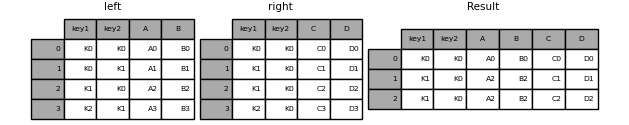

`merge()` 函数的语法如下：

```python
pd.merge(
    left,
    right,
    how="inner",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
```

具体语法参考这里：https://pandas.pydata.org/docs/user_guide/merging.html

重温一下 SQL 语句的各种连接方式的含义：
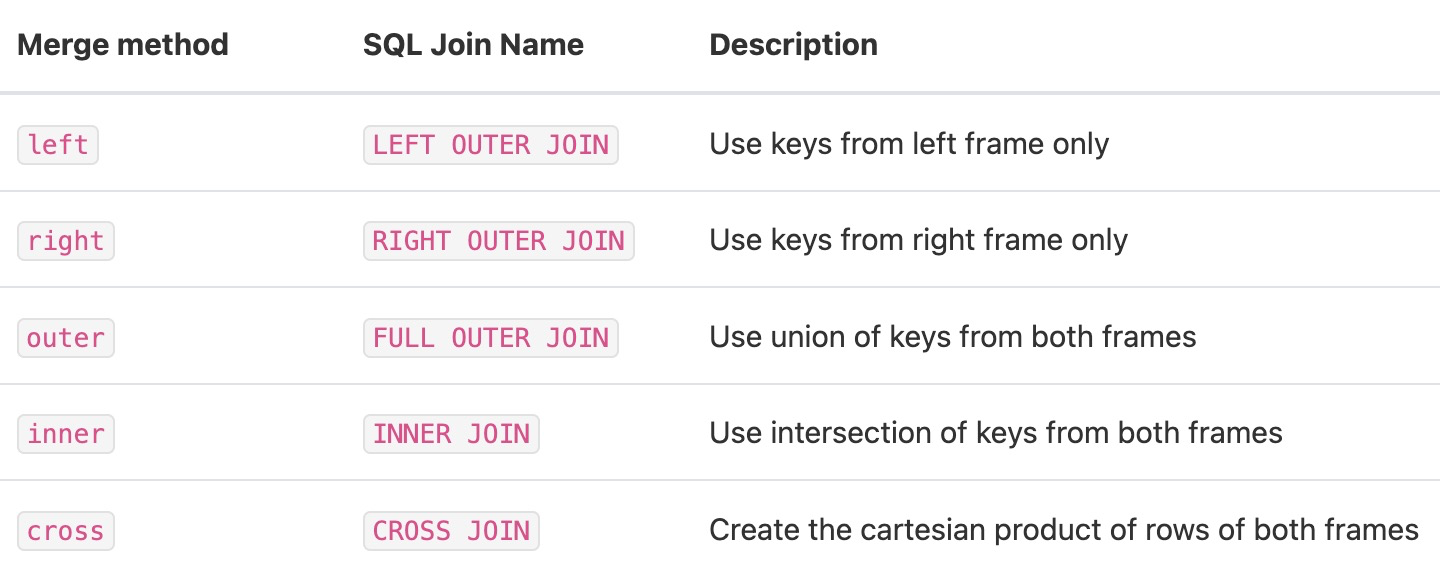

In [41]:
result = pd.merge(left, right, how='outer', on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


## 可视化

---

pandas 提供了一些内建函数，可以直接对数据集进行可视化。

<Axes: xlabel='Type 1'>

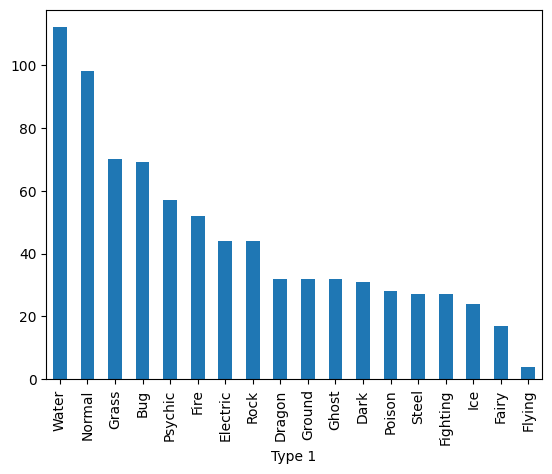

In [43]:
## 统计各类怪物的数量，按 ”Type 1“ 进行分类

pd.value_counts(poke_frame["Type 1"]).plot.bar()

In [75]:
import quandl   ## 在线实时获取股票数据的工具

quandl.ApiConfig.api_key = ""

apple = quandl.get("WIKI/AAPL")  # 获取苹果股票的数据
ms = quandl.get("wiki/msft")     # 获取微软股票的数据

In [51]:
ms[-3:]

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-23,89.50,90.460,87.08,87.18,42159397.0,0.0,1.0,89.50,90.460,87.08,87.18,42159397.0
2018-03-26,90.61,94.000,90.40,93.78,55031149.0,0.0,1.0,90.61,94.000,90.40,93.78,55031149.0
2018-03-27,94.94,95.139,88.51,89.47,53704562.0,0.0,1.0,94.94,95.139,88.51,89.47,53704562.0


<Axes: xlabel='Date'>

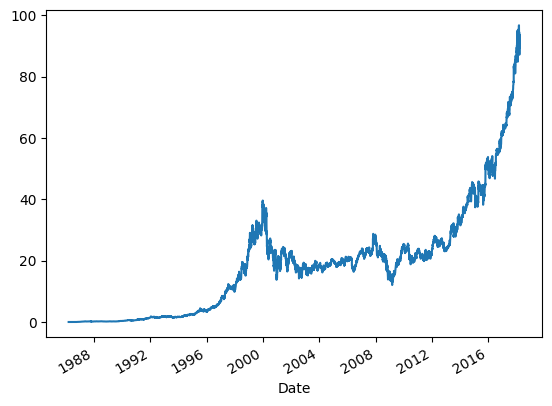

In [52]:
ms['Adj. Close'].plot()